# Capstone Three: Predicting Cancer Using A Convolutional Neural Network

Gabe Gibitz

### INTRODUCTION

Nearly everyone knows a family who has been directly impacted by the effects of breast cancer. It is the most common form of cancer in women. It is a devastating disease, and early detection is an important factor in getting the proper treatment soon enough.

Much work has been done in using deep neural networks to detect cancer, and there is still much more to do.

This particular project will examine slides of patients fighting Invasive Ductal Carcinoma (IDC), which is the most common form of breast cancer.

**THE DATA**

The original dataset consisted of 162 whole mount slide images of Breast Cancer (BCa) specimens scanned at 40x. From that, 277,524 patches of size 50 x 50 were extracted (198,738 IDC negative and 78,786 IDC positive). Each patch’s file name is of the format: uxXyYclassC.png — > example 10253idx5x1351y1101class0.png . Where u is the patient ID (10253idx5), X is the x-coordinate of where this patch was cropped from, Y is the y-coordinate of where this patch was cropped from, and C indicates the class where 0 is non-IDC and 1 is IDC.

In [62]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from skimage import io
import os
import shutil
import cv2

### DATA WRANGLING & EXPLORATORY DATA ANALYSIS

I chose a data set of more than 200,000 images, all cropped to 50 pixels by 50 pixels (50x50) in RGB. To save time, this set was already cropped, edited and placed into their respective folders.

Images, in the eyes of a computer, are simply a list of numbers corresponding to how dark a specific color (whether Red, Green or Blue) is found in that specific pixel. This means that each image in my set has three layers, the R, the G and the B.

These images were divided into dozens of folders, each having a '0' folder and a '1' folder. The 0 folder contained images with no cancerous cells, while the 1 folder contained images that were cancerous.

Most of the hard work was done, but I needed to aggregate all images into two folders:
1. Folder 0
2. Folder 1

I have commented out the following lines because I don't want the notebook to run the process multiple times. If you are recreating this for yourself, you might find this useful.

You can download the original data set here:
http://gleason.case.edu/webdata/jpi-dl-tutorial/IDC_regular_ps50_idx5.zip

Let's jump right in!

In [2]:
#patients = os.listdir('data/raw_data')

In [3]:
#os.listdir('data/raw_data/9036/0')

['9036_idx5_x1051_y2401_class0.png',
 '9036_idx5_x2951_y951_class0.png',
 '9036_idx5_x3001_y1451_class0.png',
 '9036_idx5_x3051_y801_class0.png',
 '9036_idx5_x951_y1901_class0.png',
 '9036_idx5_x2251_y751_class0.png',
 '9036_idx5_x1901_y401_class0.png',
 '9036_idx5_x3201_y1101_class0.png',
 '9036_idx5_x3351_y1251_class0.png',
 '9036_idx5_x2051_y2551_class0.png',
 '9036_idx5_x1051_y2301_class0.png',
 '9036_idx5_x1101_y2051_class0.png',
 '9036_idx5_x1751_y651_class0.png',
 '9036_idx5_x2001_y701_class0.png',
 '9036_idx5_x3001_y1351_class0.png',
 '9036_idx5_x3151_y1001_class0.png',
 '9036_idx5_x1601_y2851_class0.png',
 '9036_idx5_x1901_y301_class0.png',
 '9036_idx5_x2051_y2251_class0.png',
 '9036_idx5_x3201_y851_class0.png',
 '9036_idx5_x1101_y651_class0.png',
 '9036_idx5_x2301_y1301_class0.png',
 '9036_idx5_x2251_y1051_class0.png',
 '9036_idx5_x2651_y701_class0.png',
 '9036_idx5_x1101_y1701_class0.png',
 '9036_idx5_x1051_y1451_class0.png',
 '9036_idx5_x2051_y1501_class0.png',
 '9036_idx5_

In [4]:
#patients.remove('.DS_Store')

In [5]:
'''#For 0 folder:
for folder in patients:
    imagelist = os.listdir('data/raw_data/{}/0'.format(folder))
    for image in imagelist:
        shutil.copyfile('data/raw_data/{}/0/{}'.format(folder, image), 'data/0/{}'.format(image))'''

"#For 0 folder:\nfor folder in patients:\n    imagelist = os.listdir('data/raw_data/{}/0'.format(folder))\n    for image in imagelist:\n        shutil.copyfile('data/raw_data/{}/0/{}'.format(folder, image), 'data/0/{}'.format(image))"

In [6]:
'''#For 1 folder:
for folder in patients:
    imagelist = os.listdir('data/raw_data/{}/1'.format(folder))
    for image in imagelist:
        shutil.copyfile('data/raw_data/{}/1/{}'.format(folder, image), 'data/1/{}'.format(image))'''

"#For 1 folder:\nfor folder in patients:\n    imagelist = os.listdir('data/raw_data/{}/1'.format(folder))\n    for image in imagelist:\n        shutil.copyfile('data/raw_data/{}/1/{}'.format(folder, image), 'data/1/{}'.format(image))"

All of our images are now in one location. Let's take a look at a few of the images.

In [6]:
cancer = os.listdir('data/1')
not_cancer = os.listdir('data/0')

In [18]:
df_cancer = pd.DataFrame(cancer)
df_not = pd.DataFrame(not_cancer)
df_cancer.head()

,0
0,10286_idx5_x1251_y351_class1.png
1,10269_idx5_x1351_y651_class1.png
2,10307_idx5_x1351_y1801_class1.png
3,12910_idx5_x1001_y851_class1.png
4,12880_idx5_x1151_y2201_class1.png


In [73]:
df_not.columns = ['0']
df_not.head()

,0
0,14079_idx5_x2151_y1401_class0.png
1,12749_idx5_x1451_y701_class0.png
2,14157_idx5_x1651_y301_class0.png
3,9266_idx5_x1901_y701_class0.png
4,13693_idx5_x1901_y2851_class0.png


In [49]:
df_cancer.columns = ['1']
df_cancer.head()

,1
0,10286_idx5_x1251_y351_class1.png
1,10269_idx5_x1351_y651_class1.png
2,10307_idx5_x1351_y1801_class1.png
3,12910_idx5_x1001_y851_class1.png
4,12880_idx5_x1151_y2201_class1.png


Let's take a look at some of these images.

In [69]:
n_rows = 8
n_columns = 8

positive_tissue = np.random.choice(df_cancer.index.values, size=64, replace=False)
negative_tissue = np.random.choice(df_not.index.values, size=64, replace=False)

**Cancerous Breast Tissue**

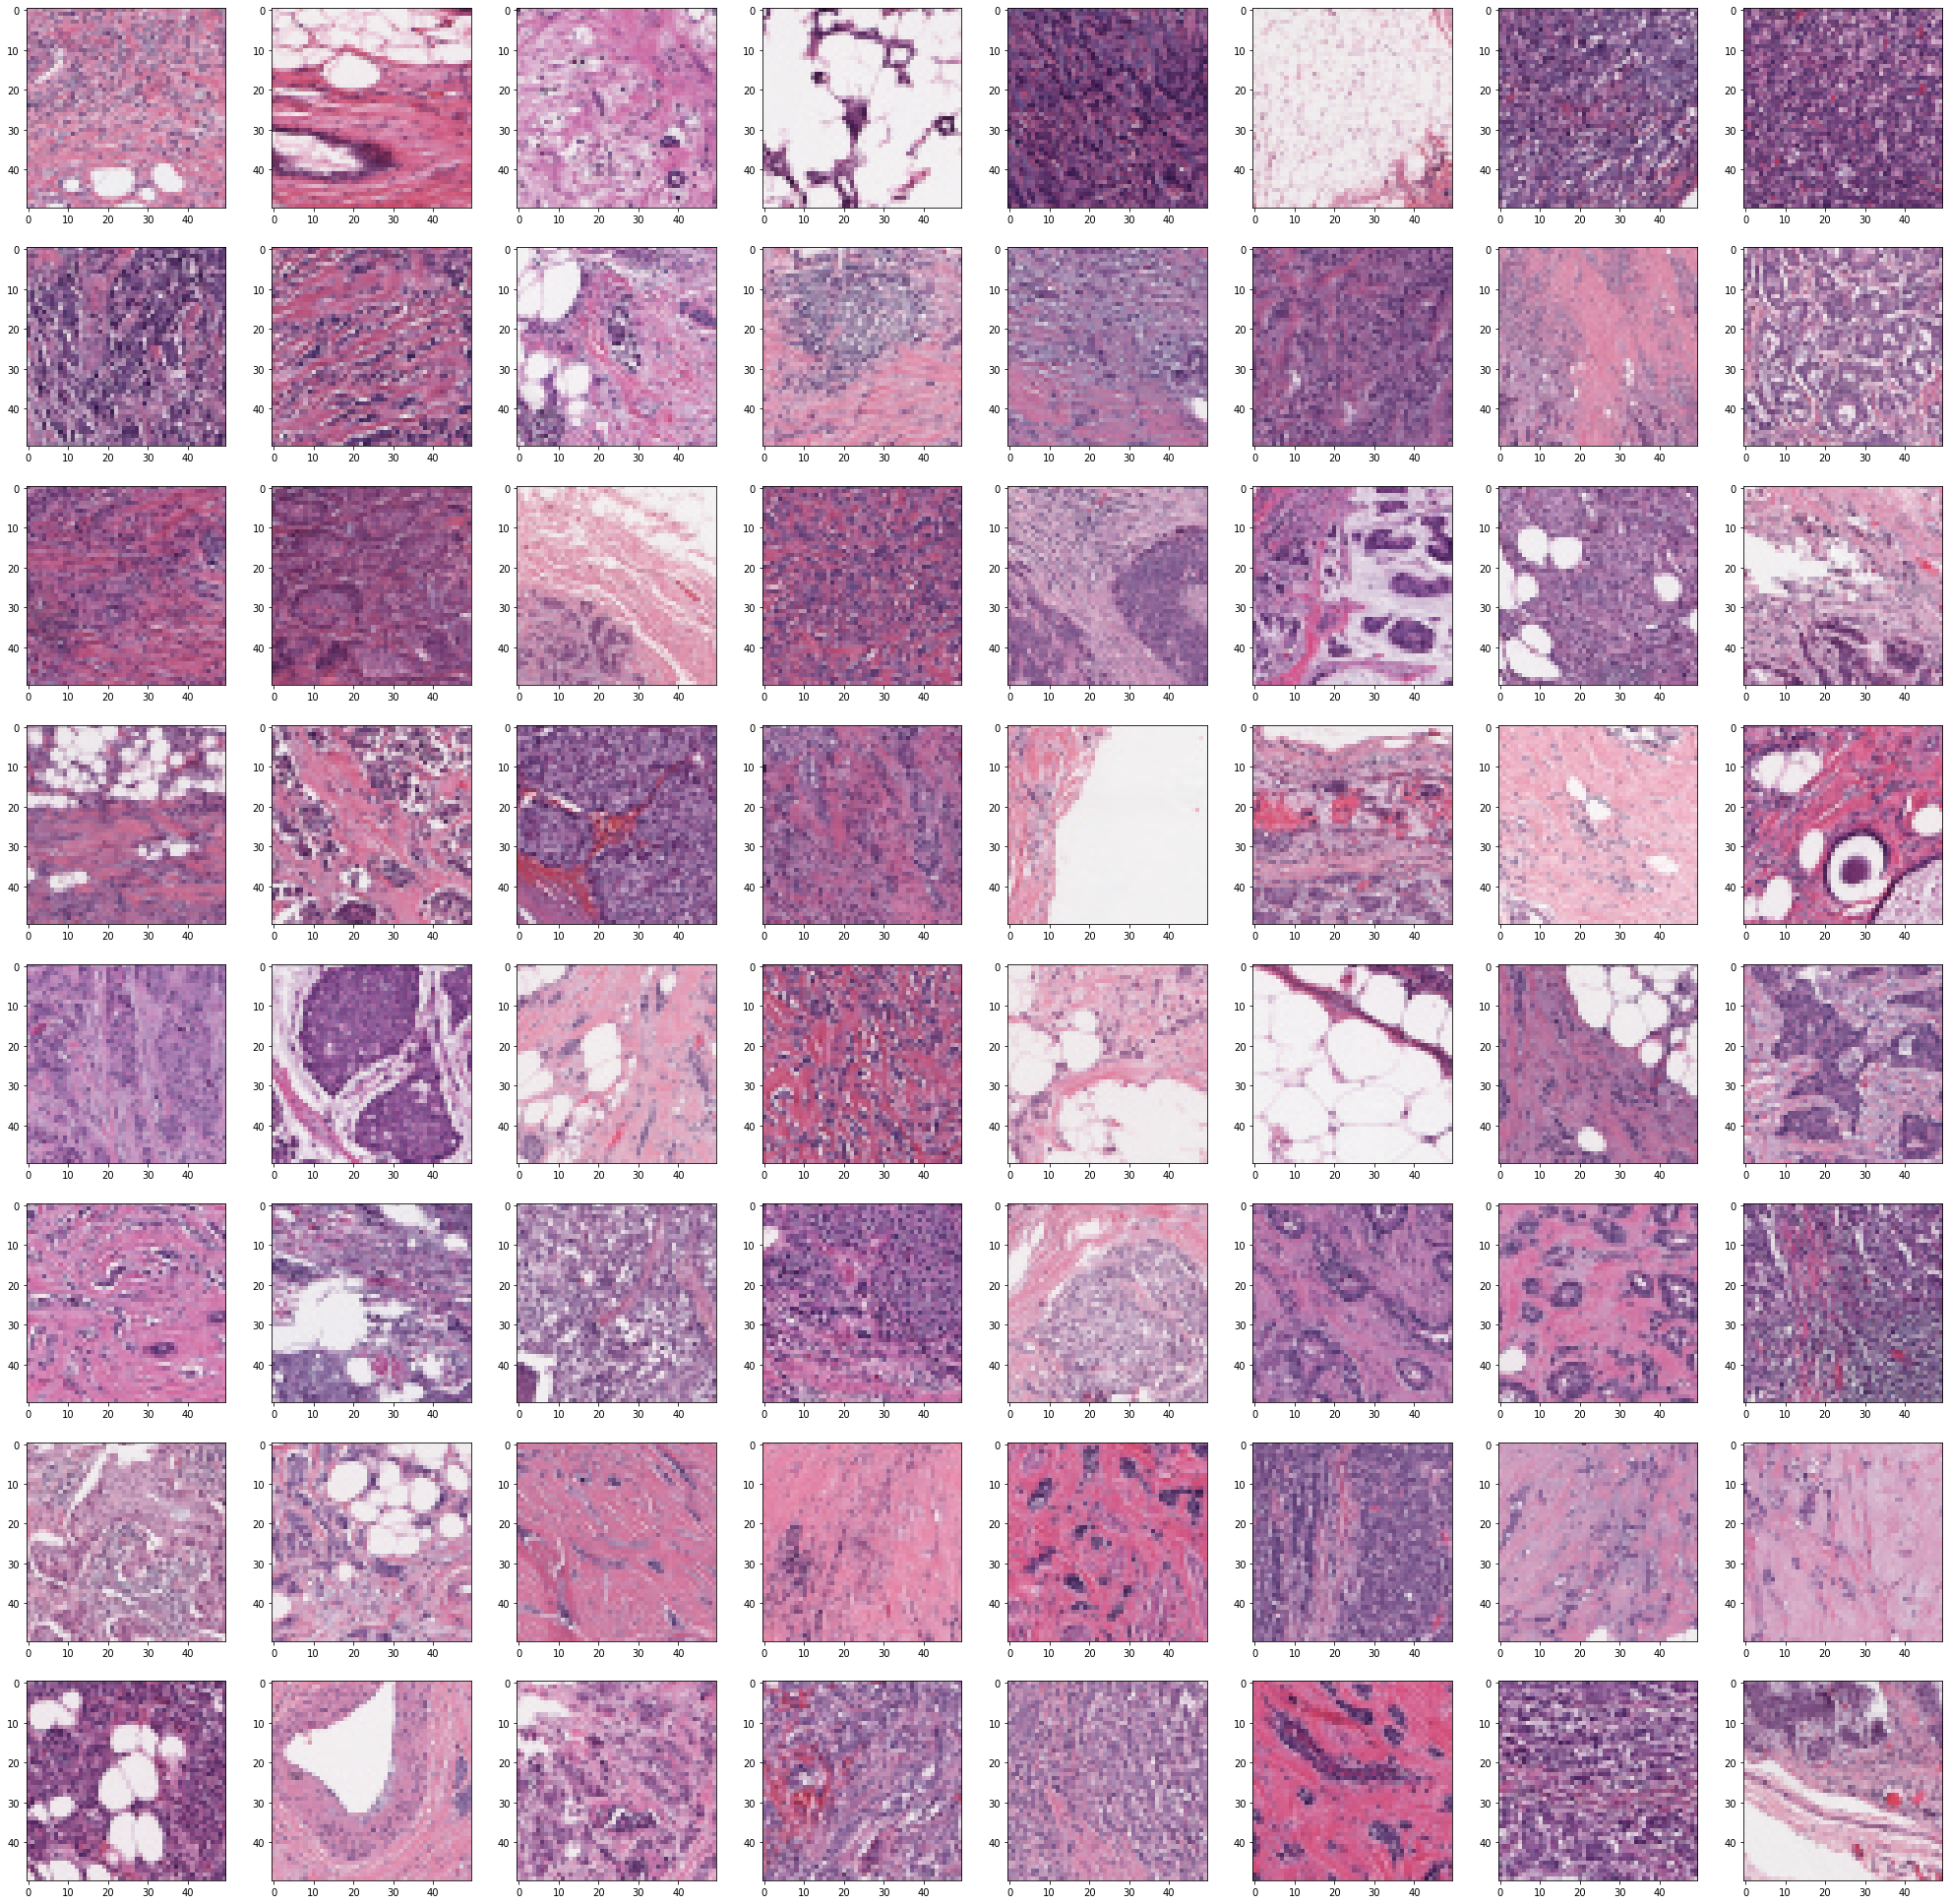

In [70]:
fig,ax = plt.subplots(n_rows,n_columns,figsize = (35,35))

for row in range(n_rows):
    for col in range (n_columns):
        idx = positive_tissue[col + n_columns*row]
        img = io.imread(('data/1/' + df_cancer.loc[idx, '1']))
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

**Non-Cancerous Tissue**

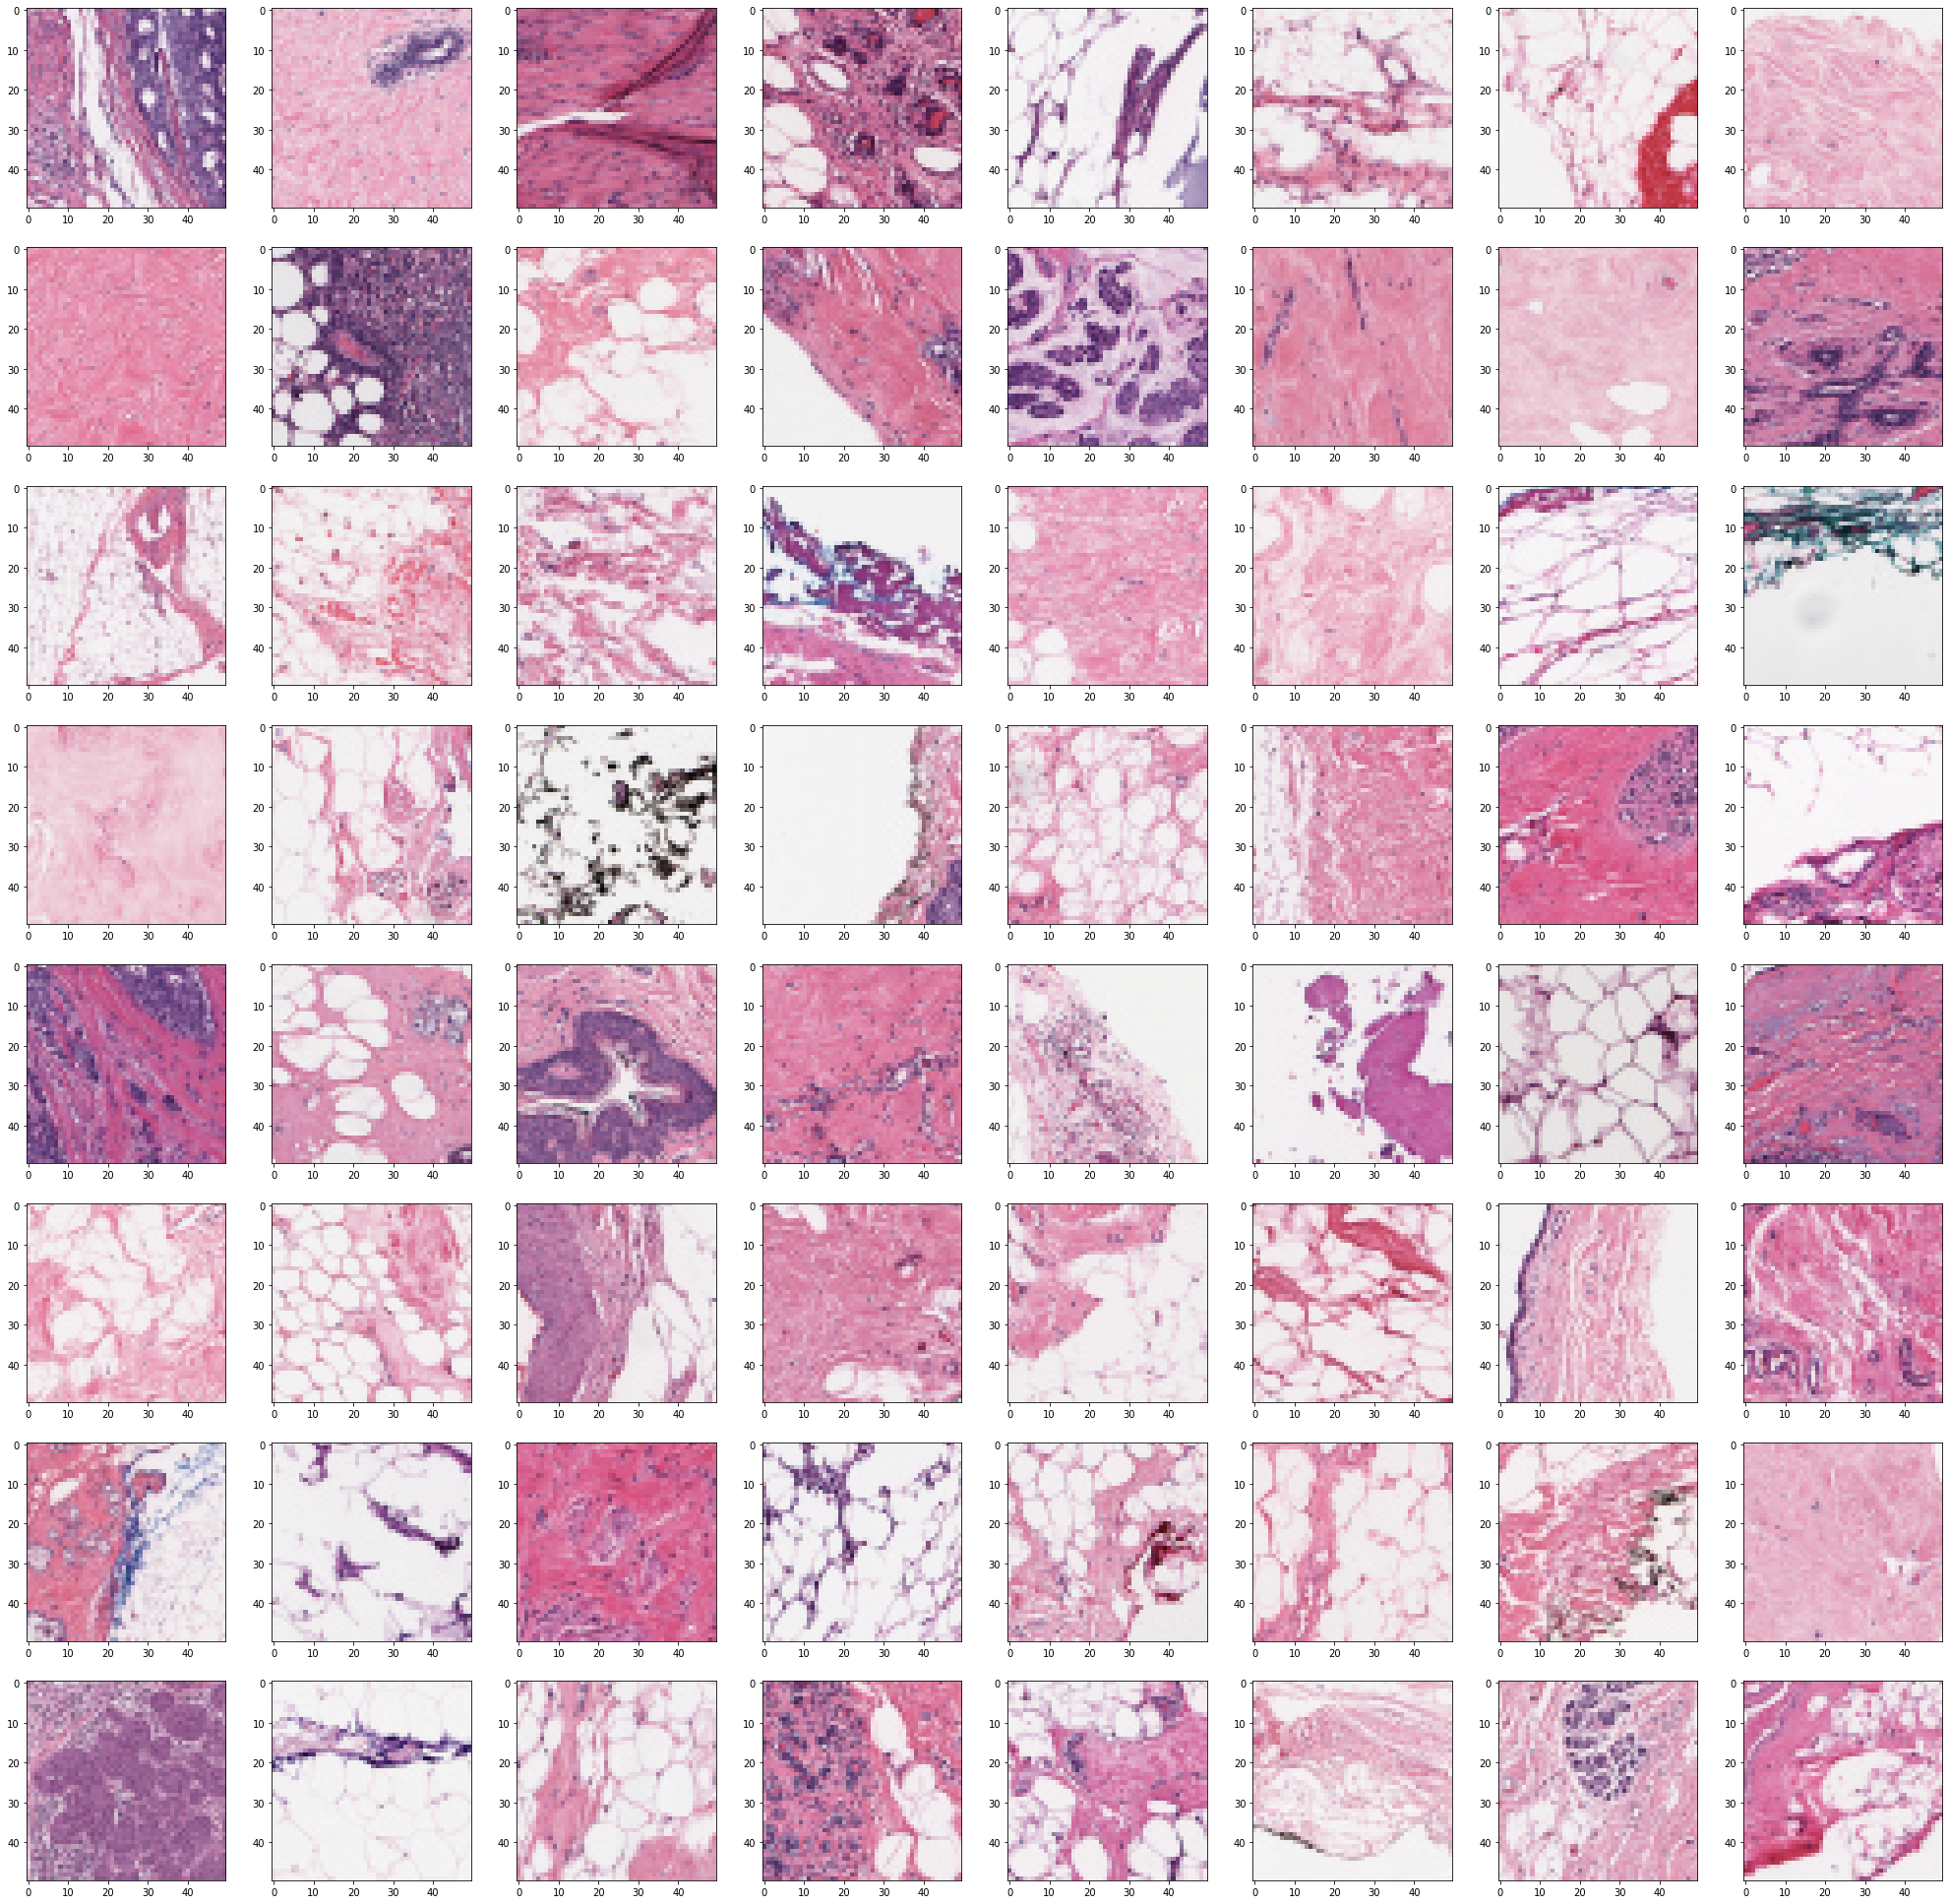

In [74]:
fig,ax = plt.subplots(n_rows,n_columns,figsize = (35,35))

for row in range(n_rows):
    for col in range (n_columns):
        idx = negative_tissue[col + n_columns*row]
        img = io.imread(('data/0/' + df_not.loc[idx, '0']))
        ax[row,col].imshow(img[:,:,:])
        ax[row,col].grid(False)

**Observations**

Though I'm not a medical doctor, a few observations and questions come to mind as we explore these images:

1. The overall color of the slides darkens drastically when you compare the slide samples. Non-cancerous tissue is, on the whole, lighter, a more vibrant pink and more consistent throughout. 
2. Though the above is an overall observation, there are quite a few slides in this non-cancerous batch that are a dark purple. This isn't a deciding categorical factor.
3. Some images are black and white.
4. There is more consistent white space in the non-cancerous images overall.

We will see how our CNN does in the next notebook.